<a href="https://colab.research.google.com/github/lakshika-wijesundara/Annomaly-detection-in-wearing-PPE/blob/main/Worker_detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xv82Gavwdrn9ZZiy62Sc")
project = rf.workspace("lakshika").project("human-detection-new-2")
version = project.version(5)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to human-detection-new-2-5 in yolov8-obb:: 100%|██████████| 3042/3042 [00:00<00:00, 4517.48it/s]


In [2]:
!pip install ultralytics
!pip install roboflow  # If downloading datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 40.4 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# Verify the dataset
model = YOLO("yolov8n.yaml")
model.data = "human-detection-new-2/data.yaml"
model.info()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8n summary: 225 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs


(225, 3157200, 3157184, 8.8575488)

In [4]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/human-detection-new-2-5/data.yaml",
    epochs=20,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name="human-detection-training"
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 286MB/s]

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/human-detection-new-2-5/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=human-detection-training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, ker

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 391MB/s]


AMP: checks passed ✅


train: Scanning /content/human-detection-new-2-5/train/labels... 1326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1326/1326 [00:00<00:00, 2057.51it/s]

train: New cache created: /content/human-detection-new-2-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/human-detection-new-2-5/valid/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 1070.99it/s]

val: New cache created: /content/human-detection-new-2-5/valid/labels.cache


Plotting labels to runs/detect/human-detection-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/human-detection-training
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.29G      1.742      2.094      1.659         58        640: 100%|██████████| 83/83 [00:32<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        126        288      0.413      0.448      0.354      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.26G      1.818      2.013        1.8         75        640: 100%|██████████| 83/83 [00:29<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        126        288      0.525      0.396      0.371      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.18G      1.916      2.012      1.862         68        640: 100%|██████████| 83/83 [00:28<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        126        288      0.462      0.438      0.387      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.24G      1.907      1.943      1.863         53        640: 100%|██████████| 83/83 [00:27<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        126        288      0.305      0.427      0.215     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.19G       1.86      1.853      1.833         75        640: 100%|██████████| 83/83 [00:29<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        126        288      0.731      0.602      0.688      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.17G      1.816      1.814      1.798         58        640: 100%|██████████| 83/83 [00:30<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        126        288      0.533      0.559      0.482      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.16G      1.777      1.744      1.763         86        640: 100%|██████████| 83/83 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        126        288       0.56      0.677       0.64      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.27G      1.761      1.713      1.741         69        640: 100%|██████████| 83/83 [00:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        126        288      0.741      0.656      0.725      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.18G       1.73      1.629      1.732         61        640: 100%|██████████| 83/83 [00:29<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        126        288       0.79      0.703      0.769      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.17G      1.703      1.611      1.705         64        640: 100%|██████████| 83/83 [00:26<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        126        288      0.814      0.698      0.792      0.392


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.15G      1.676       1.44      1.747         40        640: 100%|██████████| 83/83 [00:26<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        126        288      0.802      0.719       0.79      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.22G      1.628      1.338      1.707         28        640: 100%|██████████| 83/83 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        126        288      0.836       0.76      0.828      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.16G      1.595      1.271      1.681         25        640: 100%|██████████| 83/83 [00:24<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        126        288      0.816      0.724      0.798      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.16G      1.563      1.207      1.633         26        640: 100%|██████████| 83/83 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        126        288      0.809      0.788      0.839      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.16G      1.524       1.13      1.614         36        640: 100%|██████████| 83/83 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        126        288      0.823      0.785      0.836      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.24G      1.478      1.081      1.566         24        640: 100%|██████████| 83/83 [00:26<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        126        288      0.882      0.782      0.851       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.16G      1.483      1.069      1.561         30        640: 100%|██████████| 83/83 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        126        288      0.834      0.786      0.864      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.17G      1.439      1.004      1.544         43        640: 100%|██████████| 83/83 [00:26<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        126        288       0.85      0.799      0.882      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.14G      1.393     0.9583      1.508         31        640: 100%|██████████| 83/83 [00:24<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        126        288      0.864      0.788      0.866      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.22G      1.357     0.9434      1.482         38        640: 100%|██████████| 83/83 [00:25<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        126        288      0.907      0.795      0.884       0.45



20 epochs completed in 0.166 hours.
Optimizer stripped from runs/detect/human-detection-training/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/human-detection-training/weights/best.pt, 6.2MB

Validating runs/detect/human-detection-training/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


                   all        126        288      0.855      0.795      0.882      0.471
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/human-detection-training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781873da5750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [5]:
# Evaluate on the test dataset
metrics = model.val(data="/content/human-detection-new-2-5/data.yaml")
print(metrics)


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/human-detection-new-2-5/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


                   all        126        288      0.854      0.799      0.883      0.471
Speed: 0.7ms preprocess, 8.1ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/human-detection-training2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781a403c9a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,   

In [6]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/yolov8n.pt")

# Evaluate the model
metrics = model.val(data="/content/human-detection-new-2-5/data.yaml")

print(metrics)  # View a high-level summary of the object
print(dir(metrics))  # List all properties and methods of the metrics object
print(metrics.box)  # Inspect the box attribute specifically




Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/human-detection-new-2-5/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


                   all        126        288      0.903      0.712      0.829      0.452
                person        126        288      0.903      0.712      0.829      0.452
Speed: 0.5ms preprocess, 5.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781951a01a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026, 

In [7]:
import os

# Define the root directory for training runs
root_dir = "runs/detect"

# Iterate through all folders in the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    if "results.csv" in filenames:
        print(f"Found results.csv in: {os.path.join(dirpath, 'results.csv')}")


Found results.csv in: runs/detect/human-detection-training/results.csv


In [14]:
import pandas as pd

# Path to the results.csv file
results_path = "/content/runs/detect/human-detection-training/results.csv"

# Load the CSV into a DataFrame
results = pd.read_csv(results_path)

# Display the first few rows and column names to understand the structure
print(results.head())
print(results.columns)


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   38.5610         1.74175         2.09431         1.65944   
1      2   70.2686         1.81813         2.01254         1.79964   
2      3  101.8980         1.91563         2.01199         1.86186   
3      4  131.8620         1.90655         1.94263         1.86290   
4      5  163.5440         1.85950         1.85345         1.83278   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.41301            0.44792           0.35414   
1               0.52459            0.39583           0.37136   
2               0.46188            0.43750           0.38718   
3               0.30528            0.42708           0.21474   
4               0.73051            0.60238           0.68772   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.13331       1.97910       2.42231       1.97030  0.000659   
1              0.11605       2.56094  

In [15]:
# Display key metrics
print("\n--- Evaluation Metrics ---")

# Assuming mean_results() gives the overall mean metrics (precision, recall, mAP)
mean_metrics = metrics.box.mean_results()

# Print the metrics: mean precision, mean recall, mAP@0.5, and mAP@0.5:0.95
print(f"Precision: {mean_metrics[0]:.4f}")
print(f"Recall: {mean_metrics[1]:.4f}")
print(f"mAP@0.5: {mean_metrics[2]:.4f}")
print(f"mAP@0.5:0.95: {mean_metrics[3]:.4f}")



--- Evaluation Metrics ---
Precision: 0.9033
Recall: 0.7118
mAP@0.5: 0.8292
mAP@0.5:0.95: 0.4515


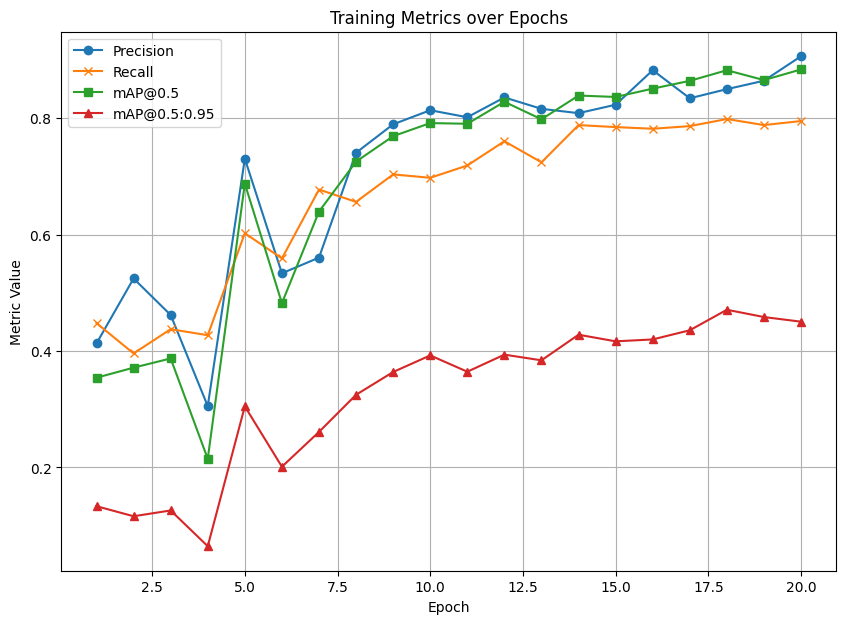

In [16]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.figure(figsize=(10, 7))
plt.plot(results['epoch'], results['metrics/precision(B)'], label="Precision", marker='o')
plt.plot(results['epoch'], results['metrics/recall(B)'], label="Recall", marker='x')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label="mAP@0.5", marker='s')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label="mAP@0.5:0.95", marker='^')
plt.title("Training Metrics over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()
plt.show()

In [20]:
results = model.train(
    data="/content/human-detection-new-2-5/data.yaml",   # Path to your dataset's .yaml file
    epochs=50,                                   # Additional epochs to fine-tune the model
    batch=16,                                    # Batch size (adjust based on hardware)
    imgsz=640,                                   # Image size (adjust based on your dataset)
    name="fine_tuned_model",                     # New name for fine-tuned model
    model="runs/detect/paper_plastic_model/weights/best.pt",  # Starting from the best model weights
    lr0=0.001,
    freeze=10,
    augment=True,
    patience=5,
    optimizer="Adam"
   )

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/paper_plastic_model/weights/best.pt, data=/content/human-detection-new-2-5/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fine_tuned_model4, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning /content/human-detection-new-2-5/train/labels.cache... 1326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1326/1326 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/human-detection-new-2-5/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]


Plotting labels to runs/detect/fine_tuned_model4/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fine_tuned_model4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.48G      3.488      3.457      3.642         58        640: 100%|██████████| 83/83 [00:29<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        126        288    0.00394      0.264    0.00487    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.31G      3.243      3.233      3.205         75        640: 100%|██████████| 83/83 [00:28<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        126        288     0.0041      0.243     0.0031    0.00075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.36G      2.997       3.18      3.045         68        640: 100%|██████████| 83/83 [00:25<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        126        288     0.0308     0.0556      0.016    0.00616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.35G      2.877      3.178       2.94         53        640: 100%|██████████| 83/83 [00:30<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        126        288     0.0498     0.0417      0.021    0.00603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.38G      2.806      3.139      2.863         75        640: 100%|██████████| 83/83 [00:26<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        126        288     0.0549     0.0764     0.0232    0.00607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.36G      2.773      3.134      2.848         58        640: 100%|██████████| 83/83 [00:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        126        288     0.0805     0.0694     0.0282    0.00755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.31G      2.705      3.103      2.789         86        640: 100%|██████████| 83/83 [00:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        126        288     0.0297     0.0903     0.0157    0.00482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.31G      2.669      3.091      2.758         69        640: 100%|██████████| 83/83 [00:26<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        126        288       0.11      0.149     0.0461     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.31G      2.646      3.021      2.732         61        640: 100%|██████████| 83/83 [00:29<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        126        288      0.106      0.132      0.041     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.31G      2.622      3.022      2.699         64        640: 100%|██████████| 83/83 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        126        288      0.181      0.135     0.0663     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.35G      2.589      2.959      2.649         54        640: 100%|██████████| 83/83 [00:30<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        126        288      0.144      0.136     0.0575     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.32G      2.552      2.951      2.638         59        640: 100%|██████████| 83/83 [00:27<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        126        288      0.145      0.156     0.0708     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.31G      2.546      2.914      2.625         77        640: 100%|██████████| 83/83 [00:28<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        126        288      0.173      0.115     0.0671      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.31G      2.512      2.931      2.601         55        640: 100%|██████████| 83/83 [00:27<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        126        288      0.157     0.0903     0.0478     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.31G      2.522      2.899      2.587         41        640: 100%|██████████| 83/83 [00:27<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        126        288      0.201      0.132     0.0906     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.34G      2.513      2.892      2.574         65        640: 100%|██████████| 83/83 [00:28<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        126        288      0.262      0.184      0.161     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.34G      2.496      2.869      2.554         50        640: 100%|██████████| 83/83 [00:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        126        288      0.232      0.193      0.115     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.31G      2.464       2.83      2.517         85        640: 100%|██████████| 83/83 [00:28<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        126        288      0.197      0.219      0.107     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.3G      2.452      2.822      2.511         58        640: 100%|██████████| 83/83 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        126        288       0.25      0.201      0.141     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.34G      2.446       2.78      2.506         56        640: 100%|██████████| 83/83 [00:29<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        126        288      0.289      0.215      0.141     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.35G      2.437      2.803      2.492         58        640: 100%|██████████| 83/83 [00:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        126        288      0.268      0.278       0.18      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.33G      2.408      2.771      2.471         73        640: 100%|██████████| 83/83 [00:28<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        126        288      0.311      0.271      0.173     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.32G      2.391      2.723      2.439         79        640: 100%|██████████| 83/83 [00:27<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        126        288      0.304      0.257      0.165     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.34G      2.378      2.749       2.44         71        640: 100%|██████████| 83/83 [00:27<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        126        288      0.279       0.24      0.167     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.32G      2.384      2.726      2.437         58        640: 100%|██████████| 83/83 [00:30<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        126        288      0.309      0.257      0.191     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.31G      2.391      2.713       2.42         72        640: 100%|██████████| 83/83 [00:26<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        126        288      0.355      0.236      0.194     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.36G      2.365      2.686      2.417         47        640: 100%|██████████| 83/83 [00:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        126        288      0.291      0.247      0.177     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.37G      2.364      2.701      2.409         71        640: 100%|██████████| 83/83 [00:27<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        126        288      0.255      0.267      0.161     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.31G      2.366      2.689      2.401         75        640: 100%|██████████| 83/83 [00:27<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        126        288      0.276      0.247      0.186     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.3G      2.358      2.682      2.398         55        640: 100%|██████████| 83/83 [00:27<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        126        288      0.352      0.274      0.252     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.3G      2.362      2.667      2.387         46        640: 100%|██████████| 83/83 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        126        288      0.368      0.293      0.251     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.3G      2.347      2.659      2.384         50        640: 100%|██████████| 83/83 [00:29<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        126        288      0.372      0.229      0.199     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.31G      2.321      2.615      2.355         55        640: 100%|██████████| 83/83 [00:25<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        126        288      0.355      0.326      0.254     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.33G      2.344      2.631      2.374         53        640: 100%|██████████| 83/83 [00:30<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        126        288      0.389      0.285      0.247     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.29G      2.318      2.622      2.357         69        640: 100%|██████████| 83/83 [00:25<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        126        288      0.357      0.292      0.234     0.0847
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



35 epochs completed in 0.295 hours.
Optimizer stripped from runs/detect/fine_tuned_model4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fine_tuned_model4/weights/best.pt, 6.2MB

Validating runs/detect/fine_tuned_model4/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


                   all        126        288       0.34      0.323      0.272      0.102
Speed: 0.3ms preprocess, 21.2ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/fine_tuned_model4


In [24]:
import locale
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set locale to UTF-8
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Path where you want to save the model
save_path = '/content/drive/MyDrive/Researchfolder/human detection model'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the trained YOLOv8 human detection model
model_path = "/content/runs/detect/fine_tuned_model4/weights/best.pt"
# Copy the model using the os.system command with the updated locale
os.system(f'cp {model_path} {save_path}')

print(f"Model saved to: {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/MyDrive/Researchfolder/human detection model
